In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt



In [2]:
def makepoint():
    global plot_list 
    random.randint(0,99)
    for num in range(0,P):
        temp = [[random.randint(0,100),random.randint(0,100)],0]
        plot_list.append(temp)



In [3]:
def showFisrt():
    global plot_list , CenterPoint ,N , P ,K ,update
    plt.xlim(0,100)
    plt.ylim(0,100)
    xall=[]
    yall=[]
    for num in range(0,P):
        x=plot_list[num][0]
        x=x[0]
        y=plot_list[num][0]
        y=y[1]
        plt.plot(x,y,"ko")
    plt.show() 


In [4]:
#K為群聚點的數量
def findDistance():
    global plot_list , CenterPoint ,N , P ,K ,update
    distance = 0
    for num in range(0,P):
        temp = 99999999999999999
        distance = 0
        place = 0
        for num2 in range(0,K):
            distance = math.pow(CenterPoint[update*K+num2][0]-plot_list[num][0][0],2) \
            +math.pow(CenterPoint[update*K+num2][1]-plot_list[num][0][1],2)
            if distance < temp:
                place = num2 + 1
                temp = distance
        plot_list[num][1] = place    
        #print plot_list[num]
       


In [5]:
def showImg():
    global plot_list , CenterPoint ,N , P ,K ,update
    for num in range(0,P):
        x=plot_list[num][0]
        x=x[0]
        y=plot_list[num][0]
        y=y[1]
        if plot_list[num][1] == 1:
            plt.plot(x,y,"bo")
        elif plot_list[num][1] == 2:
            plt.plot(x,y,"go")
        elif plot_list[num][1] == 3:
            plt.plot(x,y,"ro")
        elif plot_list[num][1] == 4:
            plt.plot(x,y,"yo")
        else :
            plt.plot(x,y,"mo")
    for num in range(0,K): #先放置好第一輪的點  這樣之後才能從這個點出發去找路線
            plt.plot(CenterPoint[num][0],CenterPoint[num][1],"kx")

    for outnum in range(0,update): #開始放第二輪並畫線        
        for num in range(0,K):
            plt.plot(CenterPoint[(outnum+1)*K+num][0],CenterPoint[(outnum+1)*K+num][1],"kx")
            xall = [CenterPoint[(outnum)*K+num][0],CenterPoint[(outnum+1)*K+num][0]]
            yall = [CenterPoint[(outnum)*K+num][1],CenterPoint[(outnum+1)*K+num][1]]
            plt.plot(xall,yall, '--')
    plt.show() 


In [6]:
def getAvange(kNumber):
    global plot_list , CenterPoint ,N , P ,K ,update
    counter=0
    allNumber=[0,0]
    for num in range(0,P):
        if plot_list[num][1] == kNumber:
            counter = counter + 1 
            allNumber[0]+=plot_list[num][0][0]
            allNumber[1]+=plot_list[num][0][1]
    if counter!= 0:
        allNumber[0] = allNumber[0]/counter
        allNumber[1] = allNumber[1]/counter
    return [allNumber[0],allNumber[1]]


In [7]:
#K為群聚點的數量
def getDistance():
    global plot_list , CenterPoint ,N , P ,K ,update
    distance = 0
    Ksum = 0
    for num in range(0,K):
        distance = 0
        counter = 0
        for num2 in range(0,P):
            if plot_list[num2][1] == num + 1 :
                distance += math.sqrt(math.pow(CenterPoint[num][0]-plot_list[num2][0][0],2) \
                +math.pow(CenterPoint[num][1]-plot_list[num2][0][1],2))
                counter += 1
        if counter != 0:
            Ksum +=  distance / counter
    if Ksum != 0:
        Ksum = Ksum / K
    return Ksum 
        #print plot_list[num]
   


In [8]:
def randomStart(kNumber):
    global plot_list , CenterPoint ,N , P ,K ,update
    temp_list = []
    bestScore = 9999999
    newScore = 0
    bestPlace = 0
    for num in range(0,kNumber):#kNumber組核心
        temp = []
        for num2 in range(0,K):
            temp.append([random.randint(0,100),random.randint(0,100)])
        temp_list.append(temp)
    #隨機生成Center組合完成
    
    for num in range(0,kNumber): #從0到kNumber組核心都測試一次平均距離
        CenterPoint = temp_list[num]
        findDistance() #取得群聚完成
        newScore = getDistance()
        if newScore < bestScore :
            bestScore = newScore
            bestPlace = num
    
    CenterPoint = temp_list[bestPlace]
    print("取得隨機最短距離")
    print(bestScore)
    print("判定最佳中心為")
    print(CenterPoint)


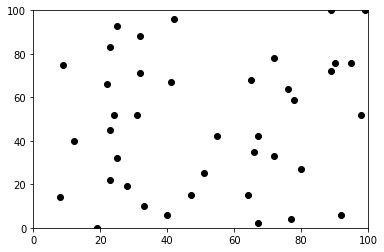

取得隨機最短距離
24.0231445871
判定最佳中心為
[[68, 26], [34, 28], [74, 64]]


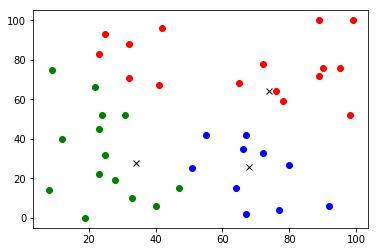

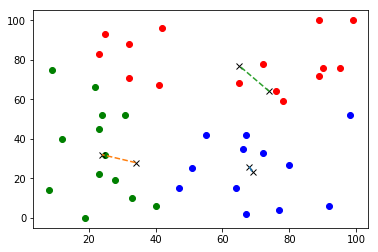

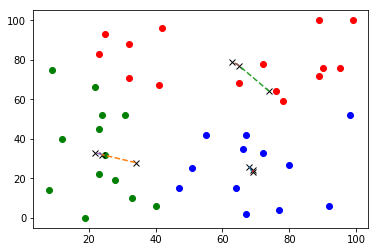

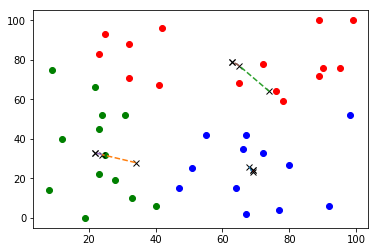

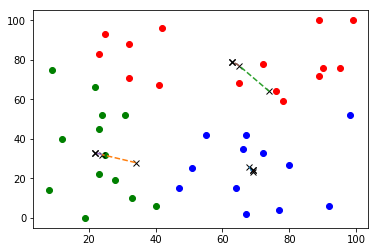

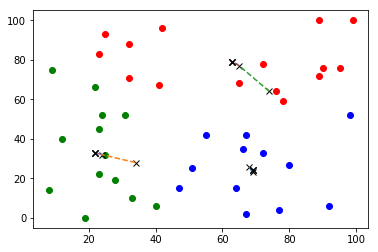

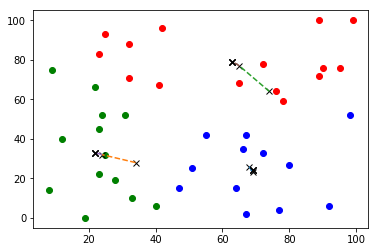

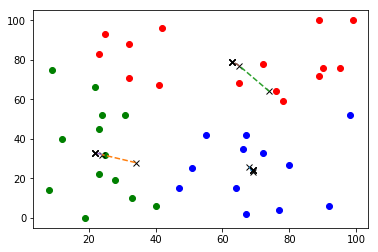

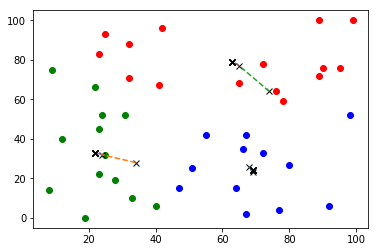

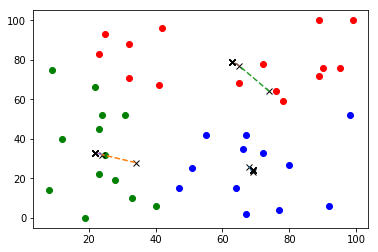

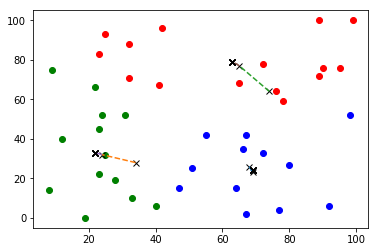

In [10]:
P = 40      #特徵點的數量
K = 3       #中心點的數量
N = 10      #執行N次
update = 0  #設定已更新次數 
plot_list =[]
CenterPoint = [[1,1],[50,50],[99,99]] #,[6,6],[60,60],[80,80]  #點的位置
#CenterPoint = []
random.seed()#生成隨機種子
#此處開始主程式
makepoint() #先初始化點
showFisrt() #顯示一次
randomStart(100) #自動篩選最佳隨機起始點 數字為幾
findDistance() #第一次分類
showImg()
for num2 in range(0,N):
    
    for num in range(1,K+1):#重新計算並插入中心
        CenterPoint.append(getAvange(num))
    update = update + 1 #紀錄更新次數
    findDistance()
    showImg()   #顯示改版後的圖
